### Find publicly available data for key *supply-demand* factors that influence US home prices *nationally*. Then, build a data science model that explains how these factors impacted home prices over the last 20 years

## FACTORS INFLUENCING U.S HOUSE PRICES

### SUPPLY DATASET

DATE - Date.

PERMIT - New Privately-Owned Housing Units Authorized in Permit-Issuing Places: Total Units (Thousands of Units, Seasonally Adjusted Annual Rate).

MSACSR - Monthly Supply of New Houses in the United States (Seasonally Adjusted).

TLRESCONS - Total Construction Spending: Residential in the United States (Millions of Dollars, Seasonally Adjusted Annual Rate.

EVACANTUSQ176N - Housing Inventory Estimate: Vacant Housing Units in the United States (Thousands of Units, Not Seasonally Adjusted.

CSUSHPISA - S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted).

### DEMAND DATASET

DATE - Date.

INTDSRUSM193N - Interest Rates, Discount Rate for United States (Billions of Dollars, Seasonally Adjusted Annual Rate).

UMCSENT - University of Michigan: Consumer Sentiment.

GDP - Gross Domestic Product (Billions of Dollars, Seasonally Adjusted Annual Rate).

MORTGAGE15US - 30-Year Fixed Rate Mortgage Average in the United States (Percent, Not Seasonally Adjusted).

CSUSHPISA - S&P/Case-Shiller U.S. National Home Price Index (Index Jan 2000=100, Seasonally Adjusted).

MSPUS - Median Sales Price of Houses Sold for the United States (Not Seasonally Adjusted).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1= pd.read_csv('supply.csv')

In [3]:
data1.head()

,DATE,CSUSHPISA,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N
0,01-01-2003,129.321,4.2,1806.333333,421328.6667,14908
1,01-04-2003,131.756,3.833333333,1837.666667,429308.6667,15244
2,01-07-2003,135.013,3.633333333,1937.333333,458890,15614
3,01-10-2003,138.8356667,3.966666667,1972.333333,491437.3333,15654
4,01-01-2004,143.2986667,3.7,1994.666667,506856.3333,15895


In [4]:
data2= pd.read_csv('demand.csv')

In [5]:
data2.head()

,DATE,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,01-01-2003,129.321000,5.840769,79.966667,2.250000,186000,11174.129
1,01-04-2003,131.756000,5.506923,89.266667,2.166667,191800,11312.766
2,01-07-2003,135.013000,6.033846,89.300000,2.000000,191900,11566.669
3,01-10-2003,138.835667,5.919286,91.966667,2.000000,198800,11772.234
4,01-01-2004,143.298667,5.597500,98.000000,2.000000,212700,11923.447


In [6]:
data1.dtypes

DATE              object
CSUSHPISA         object
MSACSR            object
PERMIT            object
TLRESCONS         object
EVACANTUSQ176N    object
dtype: object

In [7]:
data2.dtypes

DATE              object
CSUSHPISA        float64
MORTGAGE30US     float64
UMCSENT          float64
INTDSRUSM193N    float64
MSPUS              int64
GDP              float64
dtype: object

In [8]:
#Correcting datatype of Date column
data1['DATE'] = pd.to_datetime(data1['DATE'])
data2['DATE'] = pd.to_datetime(data2['DATE'])

In [9]:
#Sorting date column
data1 = data1.sort_values('DATE')
data2 = data2.sort_values('DATE')

In [10]:
#Merging both datasets
df = pd.merge(data1, data2, on='DATE', suffixes=('_supply', '_demand'))

In [11]:
df.head()

,DATE,CSUSHPISA_supply,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,CSUSHPISA_demand,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP
0,2003-01-01,129.321,4.2,1806.333333,421328.6667,14908,129.321000,5.840769,79.966667,2.250000,186000,11174.129
1,2003-01-04,131.756,3.833333333,1837.666667,429308.6667,15244,131.756000,5.506923,89.266667,2.166667,191800,11312.766
2,2003-01-07,135.013,3.633333333,1937.333333,458890,15614,135.013000,6.033846,89.300000,2.000000,191900,11566.669
3,2003-01-10,138.8356667,3.966666667,1972.333333,491437.3333,15654,138.835667,5.919286,91.966667,2.000000,198800,11772.234
4,2004-01-01,143.2986667,3.7,1994.666667,506856.3333,15895,143.298667,5.597500,98.000000,2.000000,212700,11923.447


In [12]:
#dropping duplicate column
df.drop('CSUSHPISA_supply', axis=1, inplace=True)

In [13]:
df.rename(columns={'CSUSHPISA_demand': 'CSUSHPISA'}, inplace=True)

In [14]:
#checking null 
df.isnull().sum()

DATE              0
MSACSR            0
PERMIT            0
TLRESCONS         0
EVACANTUSQ176N    0
CSUSHPISA         1
MORTGAGE30US      0
UMCSENT           0
INTDSRUSM193N     7
MSPUS             0
GDP               0
dtype: int64

In [15]:
#dropping null
df.dropna(inplace=True)

In [16]:
#checking shape
df.shape

(74, 11)

In [17]:
# Extracting year, month, and day from DATE column to train model easily
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['day'] = df['DATE'].dt.day

In [18]:
#dropping Date column
df = df.drop('DATE', axis=1)

In [19]:
df.head()

,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,MSPUS,GDP,year,month,day
0,4.2,1806.333333,421328.6667,14908,129.321000,5.840769,79.966667,2.250000,186000,11174.129,2003,1,1
1,3.833333333,1837.666667,429308.6667,15244,131.756000,5.506923,89.266667,2.166667,191800,11312.766,2003,1,4
2,3.633333333,1937.333333,458890,15614,135.013000,6.033846,89.300000,2.000000,191900,11566.669,2003,1,7
3,3.966666667,1972.333333,491437.3333,15654,138.835667,5.919286,91.966667,2.000000,198800,11772.234,2003,1,10
4,3.7,1994.666667,506856.3333,15895,143.298667,5.597500,98.000000,2.000000,212700,11923.447,2004,1,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MSACSR          74 non-null     object 
 1   PERMIT          74 non-null     object 
 2   TLRESCONS       74 non-null     object 
 3   EVACANTUSQ176N  74 non-null     object 
 4   CSUSHPISA       74 non-null     float64
 5   MORTGAGE30US    74 non-null     float64
 6   UMCSENT         74 non-null     float64
 7   INTDSRUSM193N   74 non-null     float64
 8   MSPUS           74 non-null     int64  
 9   GDP             74 non-null     float64
 10  year            74 non-null     int64  
 11  month           74 non-null     int64  
 12  day             74 non-null     int64  
dtypes: float64(5), int64(4), object(4)
memory usage: 8.1+ KB


In [21]:
#changing datatype of all object type columns
df['MSACSR']= df['MSACSR'].astype('float')
df['PERMIT']= df['PERMIT'].astype('float')
df['TLRESCONS']= df['TLRESCONS'].astype('float')
df['EVACANTUSQ176N']= df['EVACANTUSQ176N'].astype('float')

In [22]:
#Checking NUMERICAL FEATURE : float type

numerical_continuous_feature=[feature for feature in df.columns if  df[feature].dtype=='float']
df[numerical_continuous_feature].head()

,MSACSR,PERMIT,TLRESCONS,EVACANTUSQ176N,CSUSHPISA,MORTGAGE30US,UMCSENT,INTDSRUSM193N,GDP
0,4.200000,1806.333333,421328.6667,14908.0,129.321000,5.840769,79.966667,2.250000,11174.129
1,3.833333,1837.666667,429308.6667,15244.0,131.756000,5.506923,89.266667,2.166667,11312.766
2,3.633333,1937.333333,458890.0000,15614.0,135.013000,6.033846,89.300000,2.000000,11566.669
3,3.966667,1972.333333,491437.3333,15654.0,138.835667,5.919286,91.966667,2.000000,11772.234
4,3.700000,1994.666667,506856.3333,15895.0,143.298667,5.597500,98.000000,2.000000,11923.447


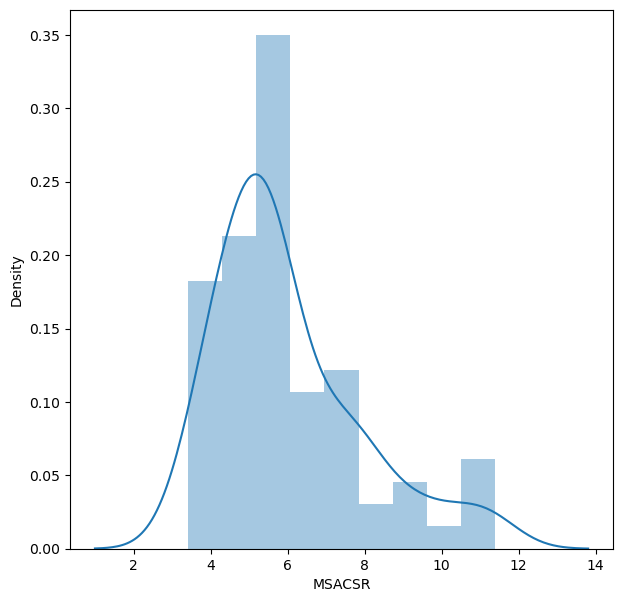

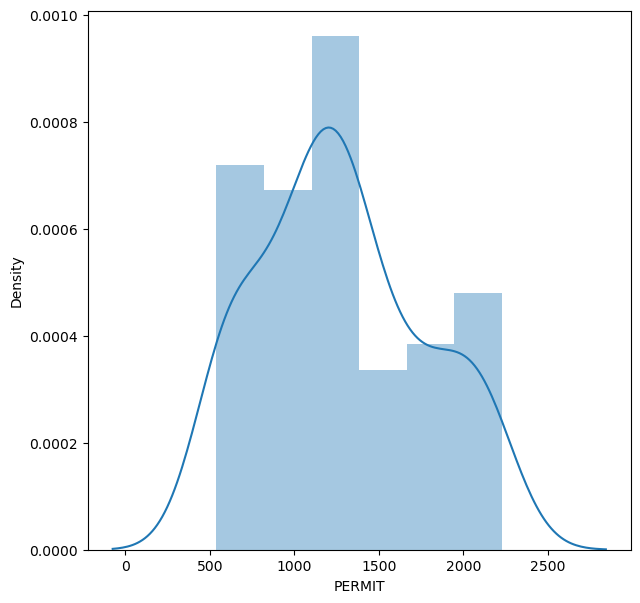

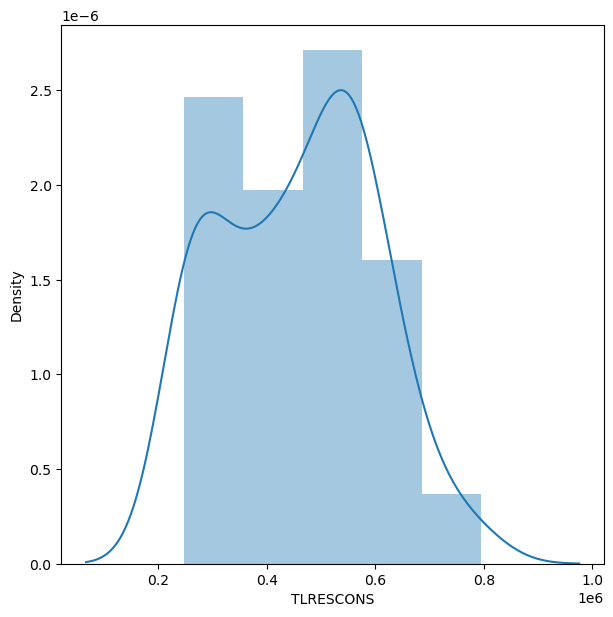

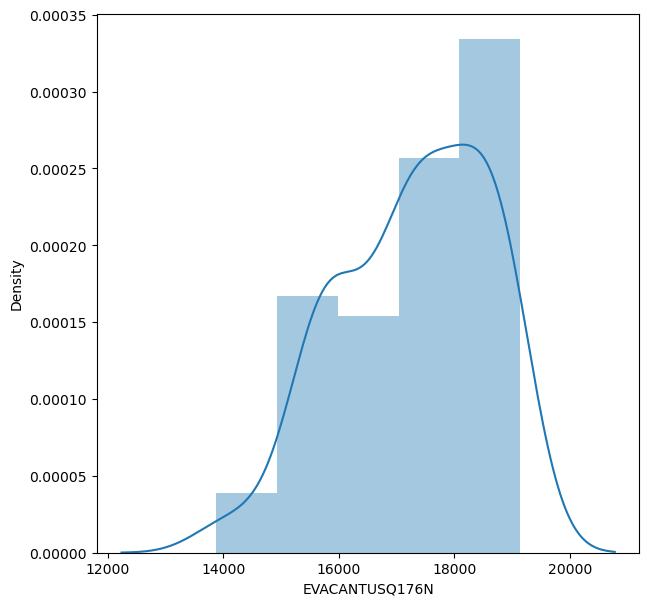

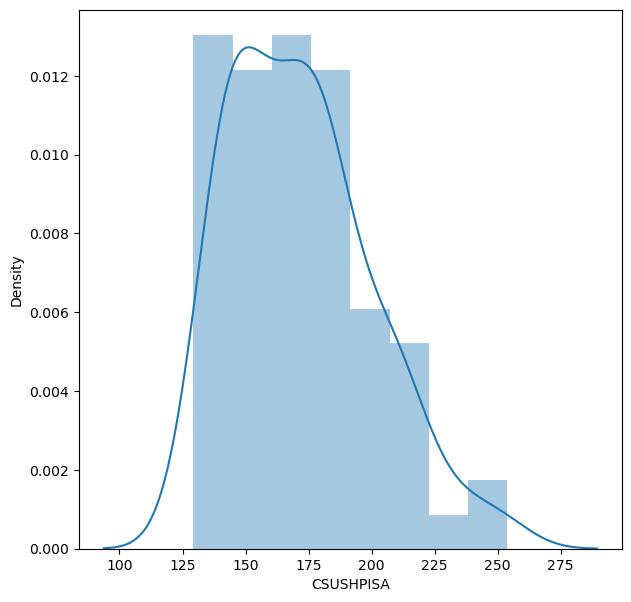

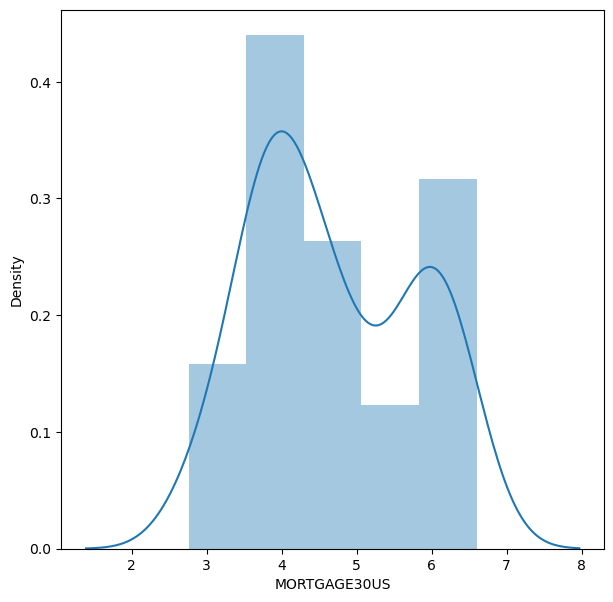

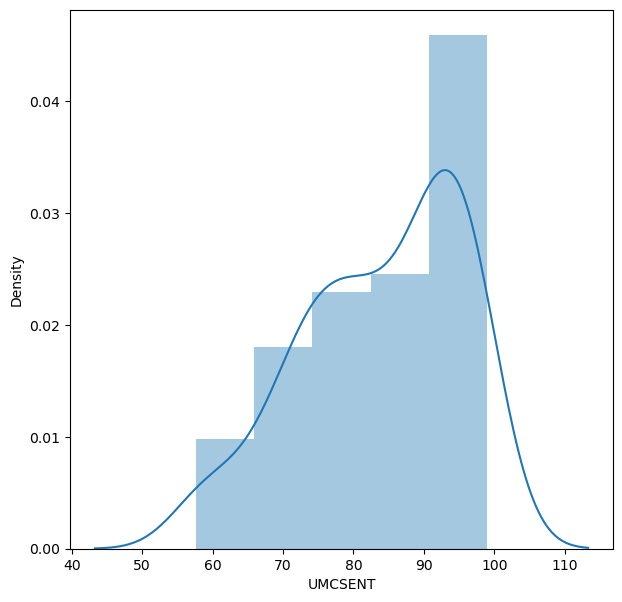

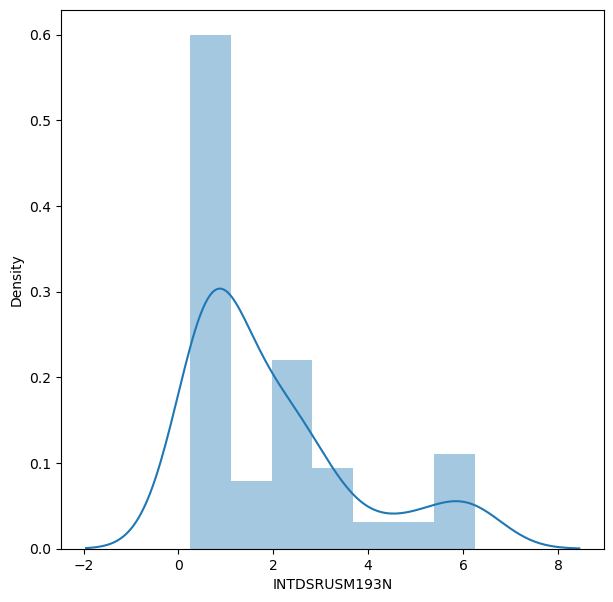

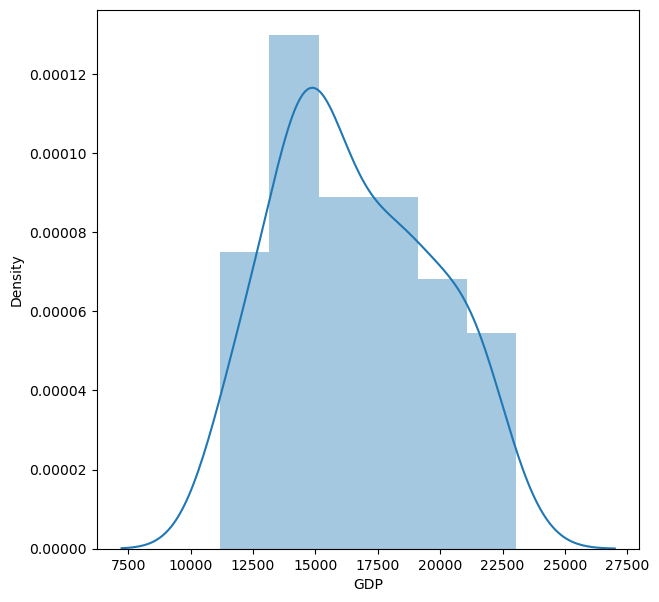

In [23]:
for feature in numerical_continuous_feature:
  plt.figure(figsize=(7,7))
  sns.distplot(df[feature],kde=True)

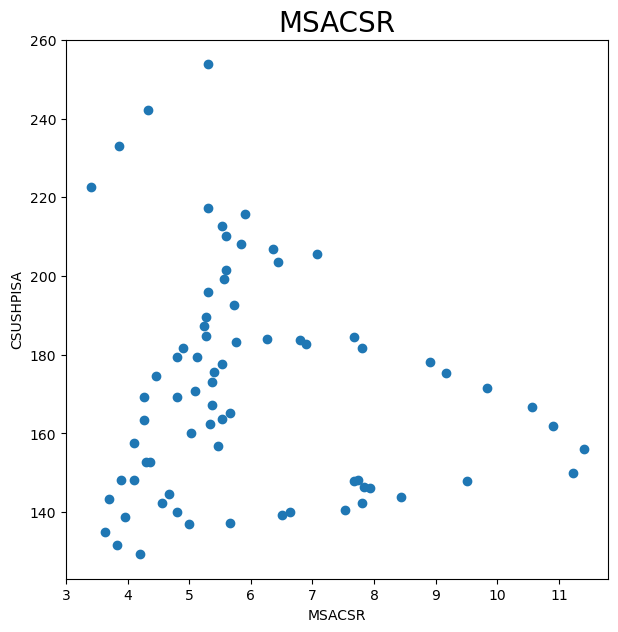

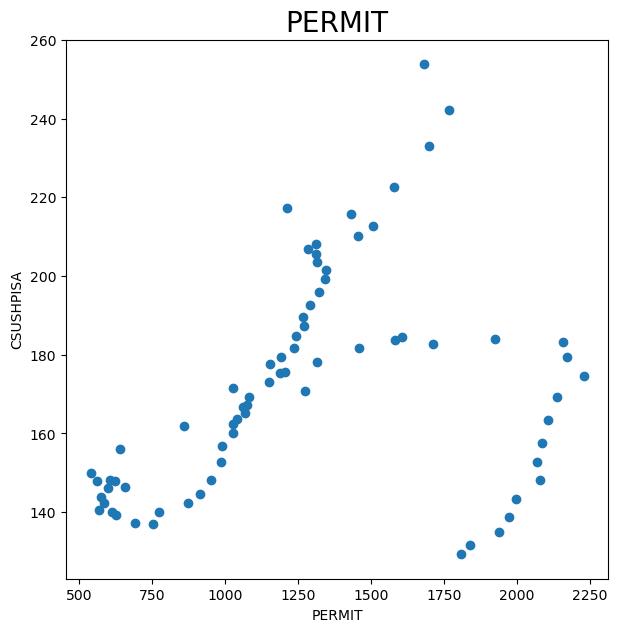

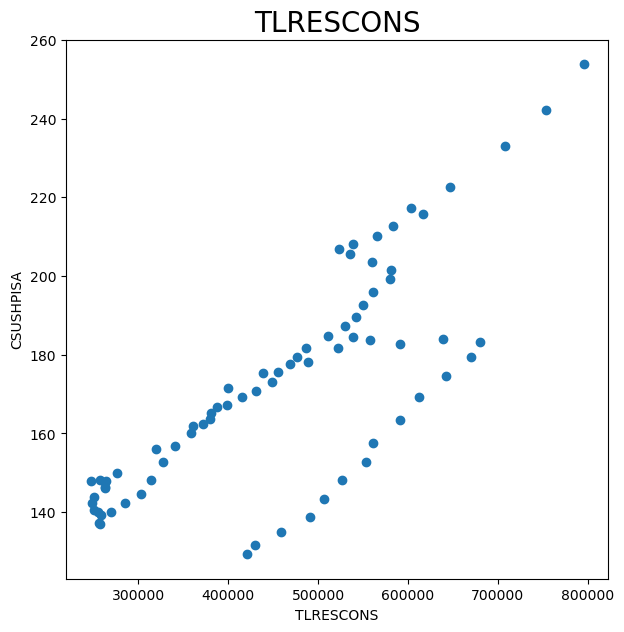

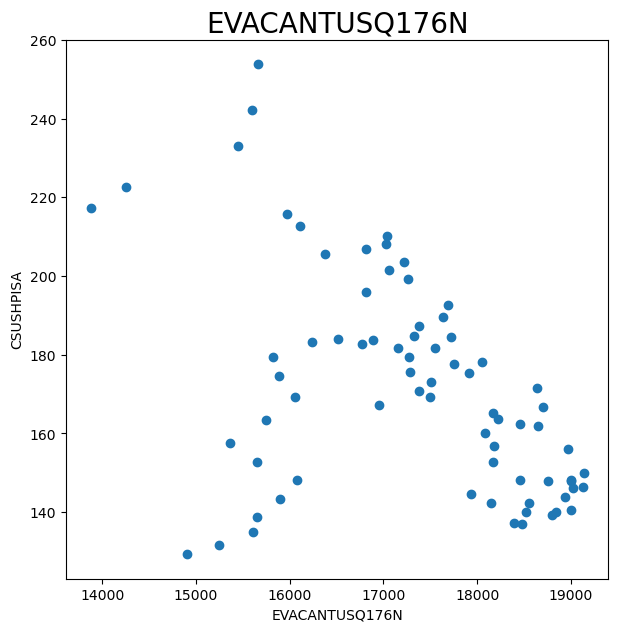

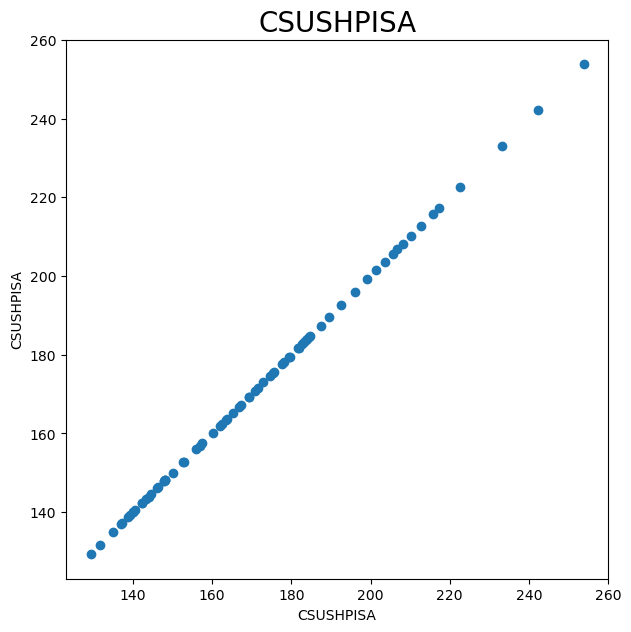

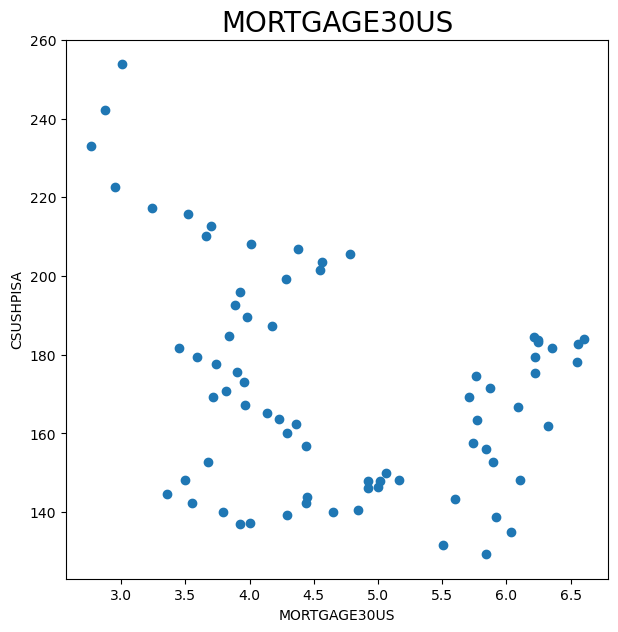

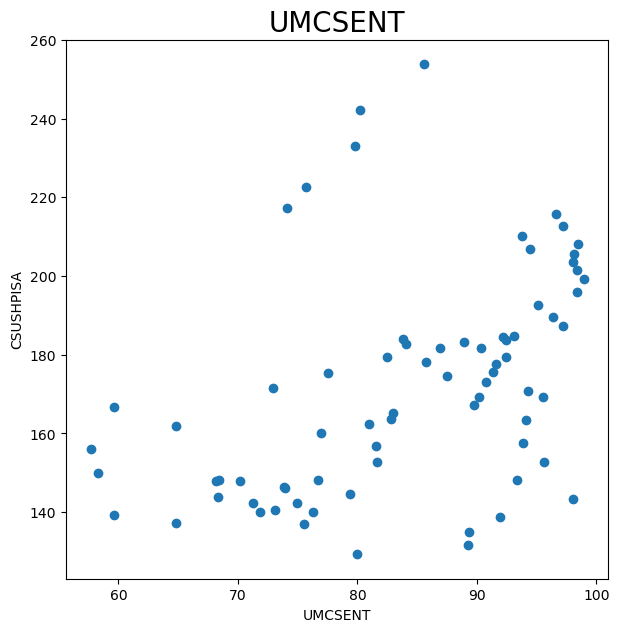

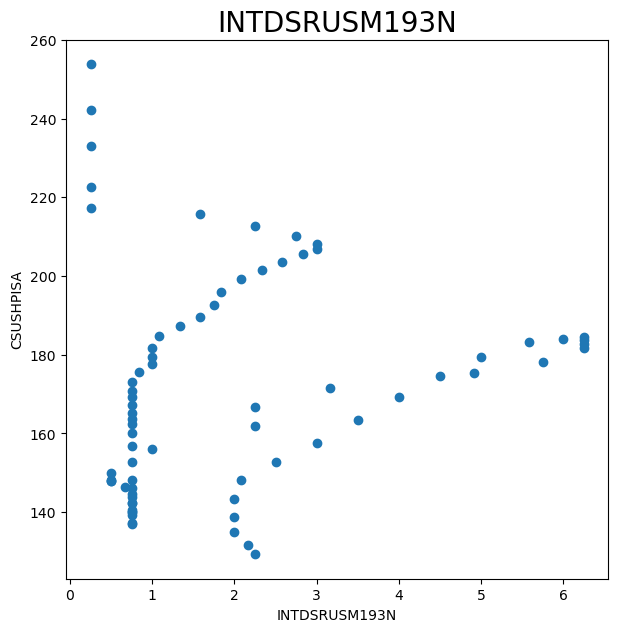

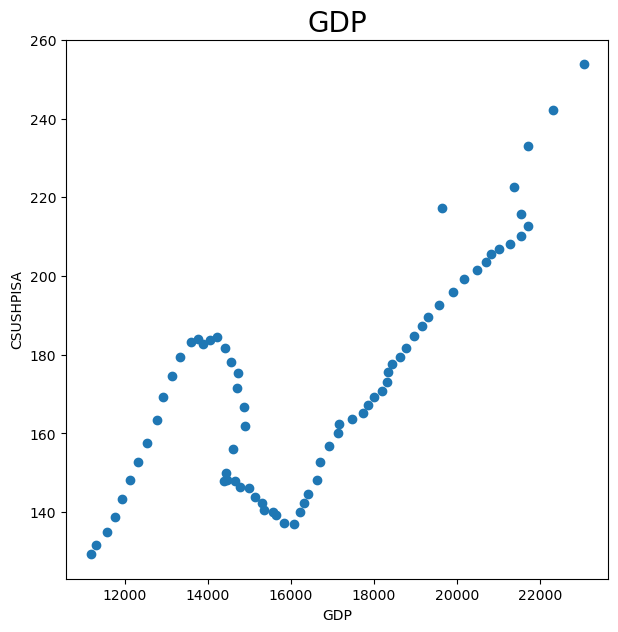

In [24]:
for feature in numerical_continuous_feature:
  plt.figure(figsize=(7,7))
  plt.scatter(x=feature,y='CSUSHPISA',data=df)
  plt.xlabel(feature)
  plt.ylabel("CSUSHPISA")
  plt.title(feature,fontsize=20)

In [25]:
# transformation of the data and see the relation with respect to target variable

for feature in numerical_continuous_feature:
  df[feature]=np.log(df[feature])

<AxesSubplot:>

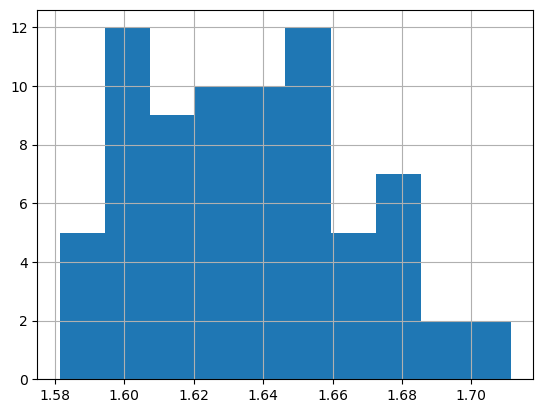

In [26]:
df['CSUSHPISA']=np.log(df['CSUSHPISA'])
df['CSUSHPISA'].hist()

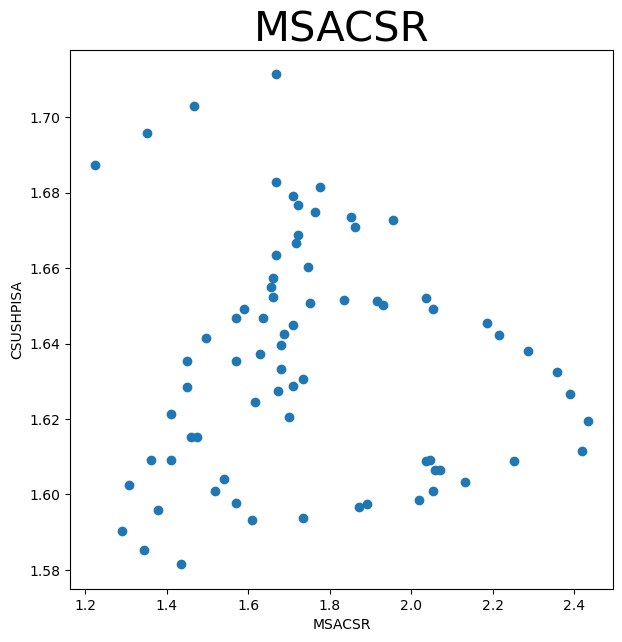

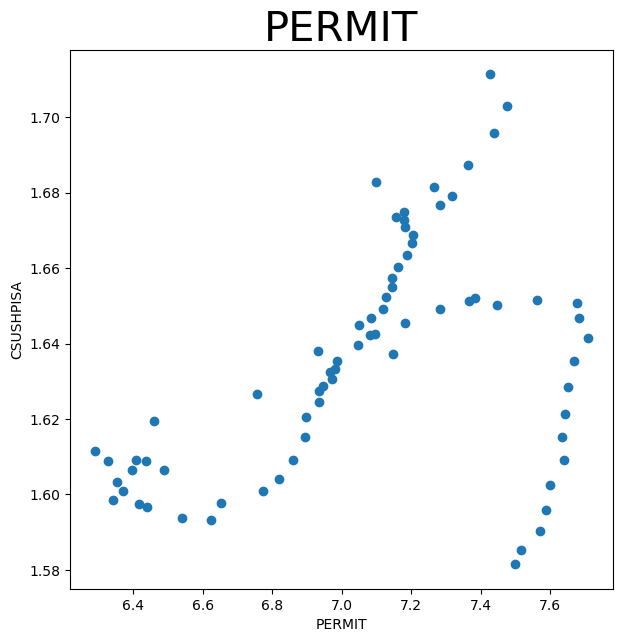

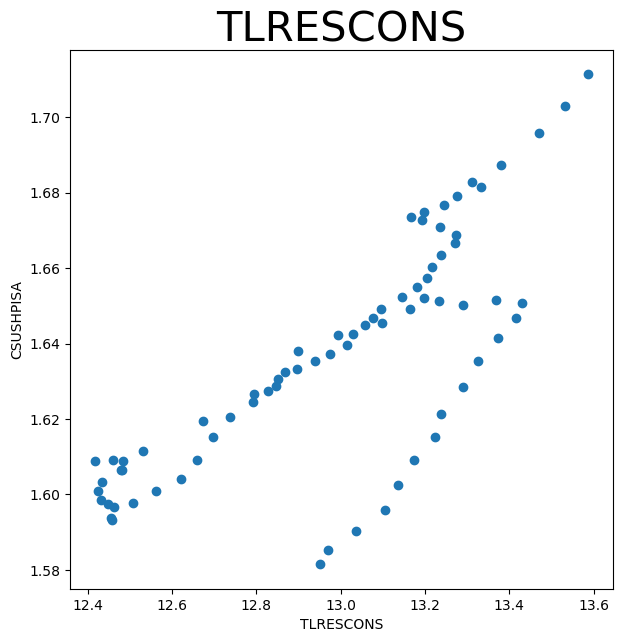

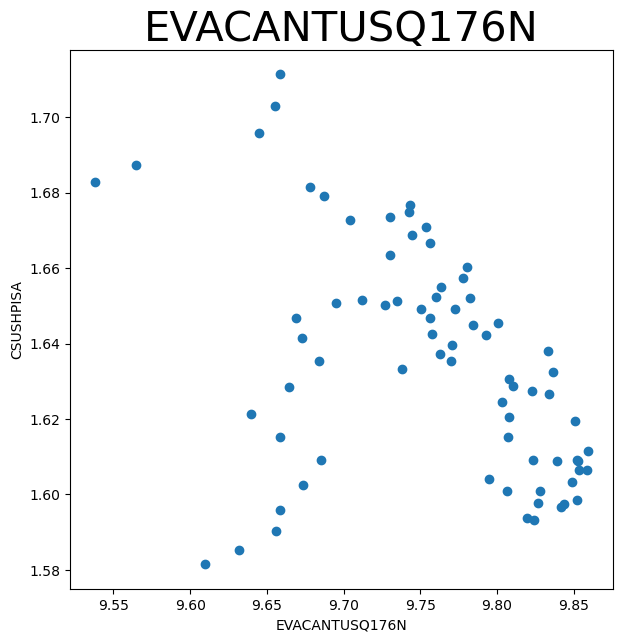

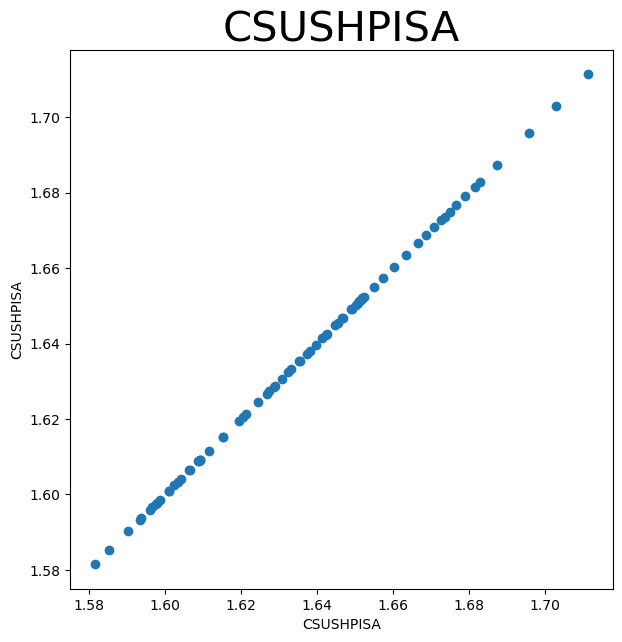

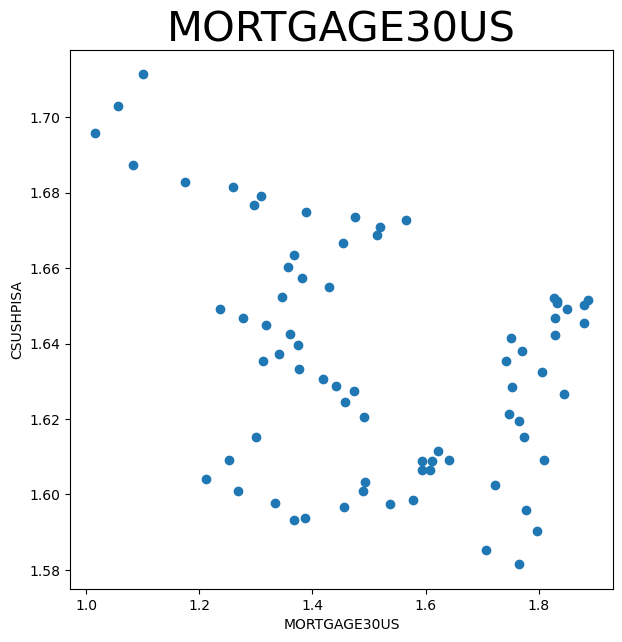

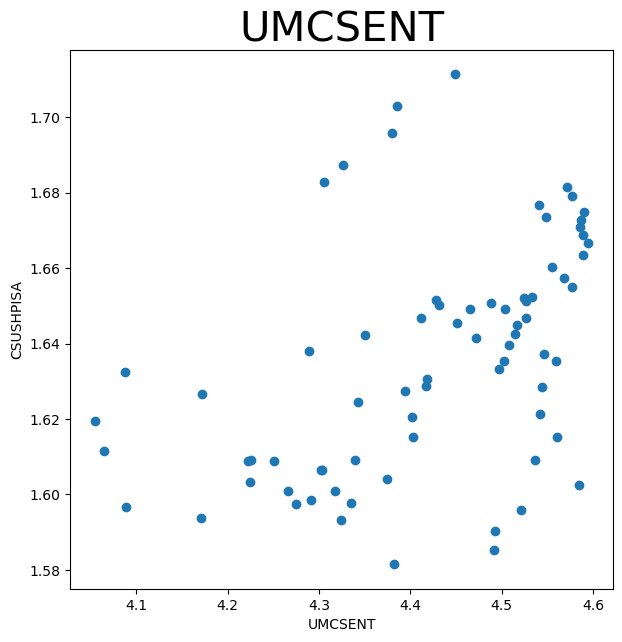

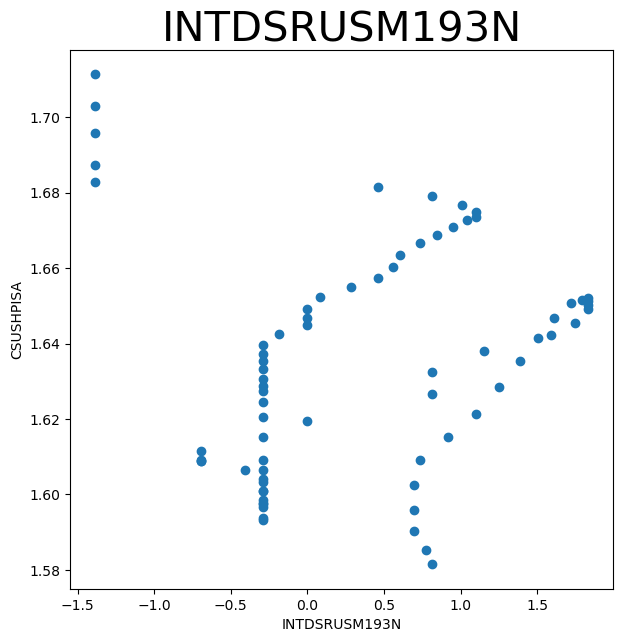

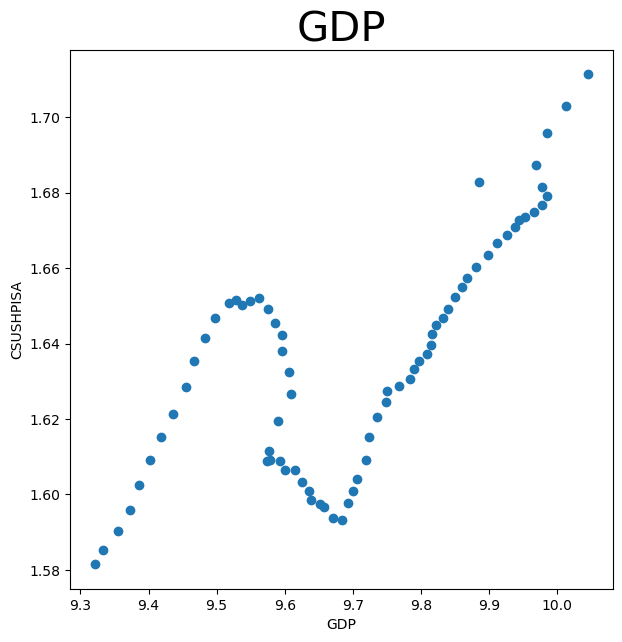

In [27]:
for feature in numerical_continuous_feature:
  plt.figure(figsize=(7,7))
  plt.scatter(x=feature,y='CSUSHPISA',data=df)
  plt.xlabel(feature)
  plt.ylabel("CSUSHPISA")
  plt.title(feature,fontsize=30)

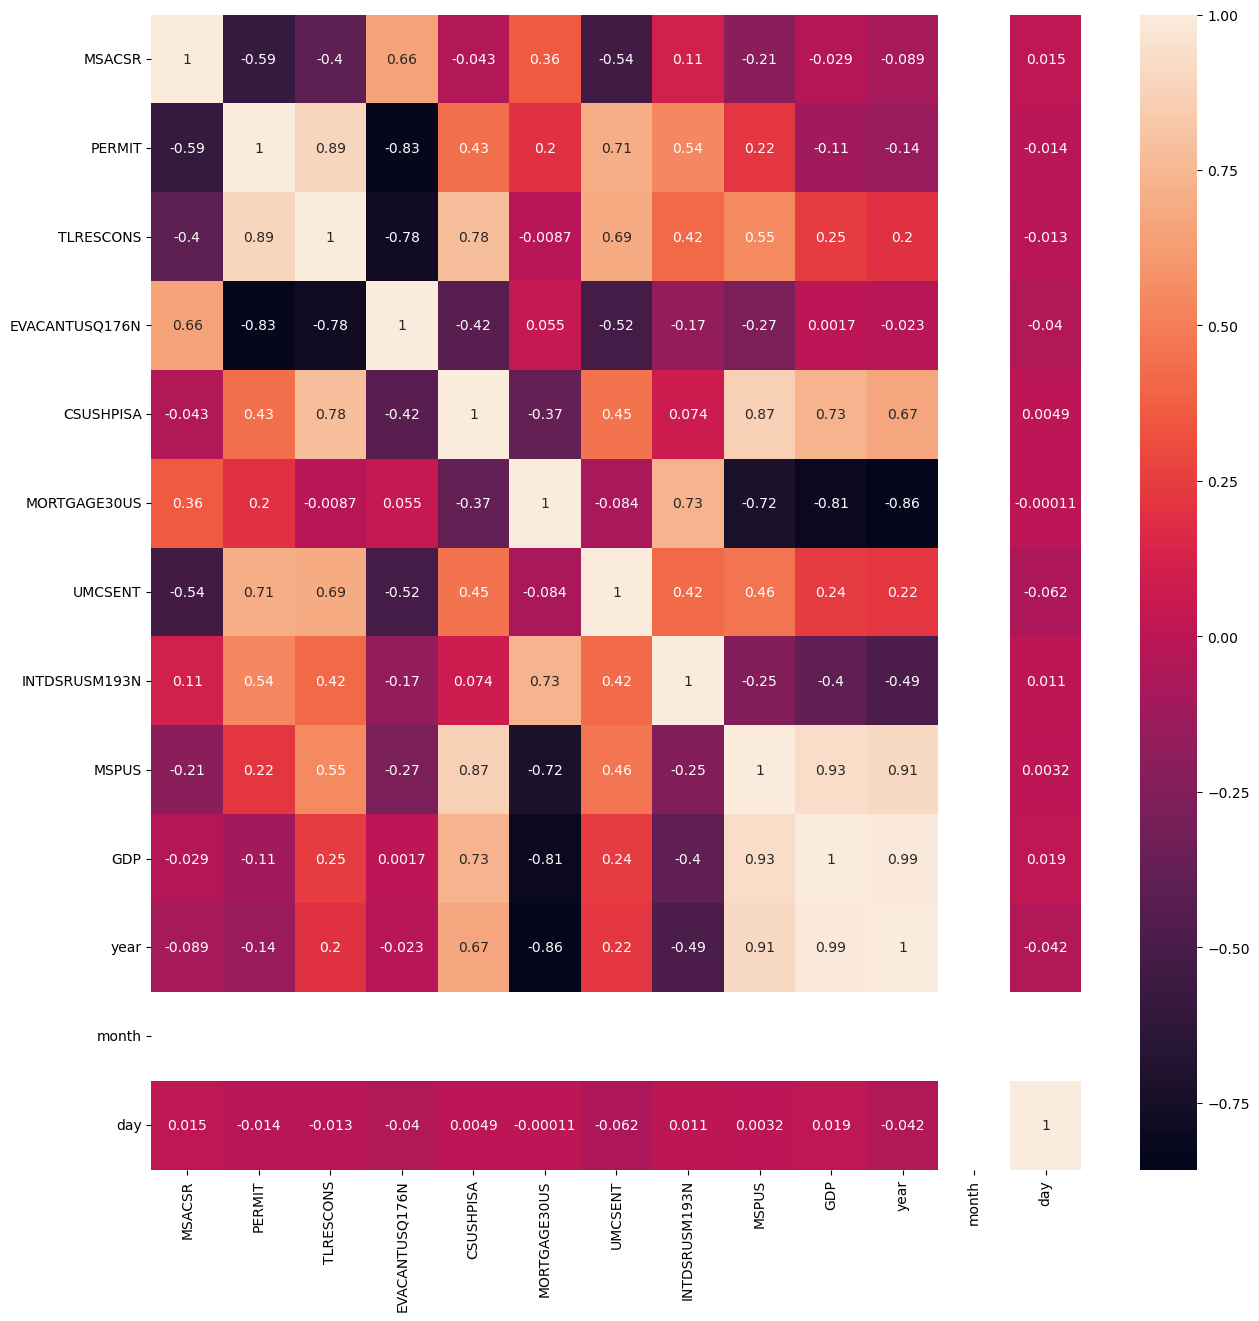

In [28]:
# heatmap to check if there are factors that have any correlation with CSUSHPISA
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

### TLRESCONS, MSPUS, GDP have very strong correlation with CSUSHPISA

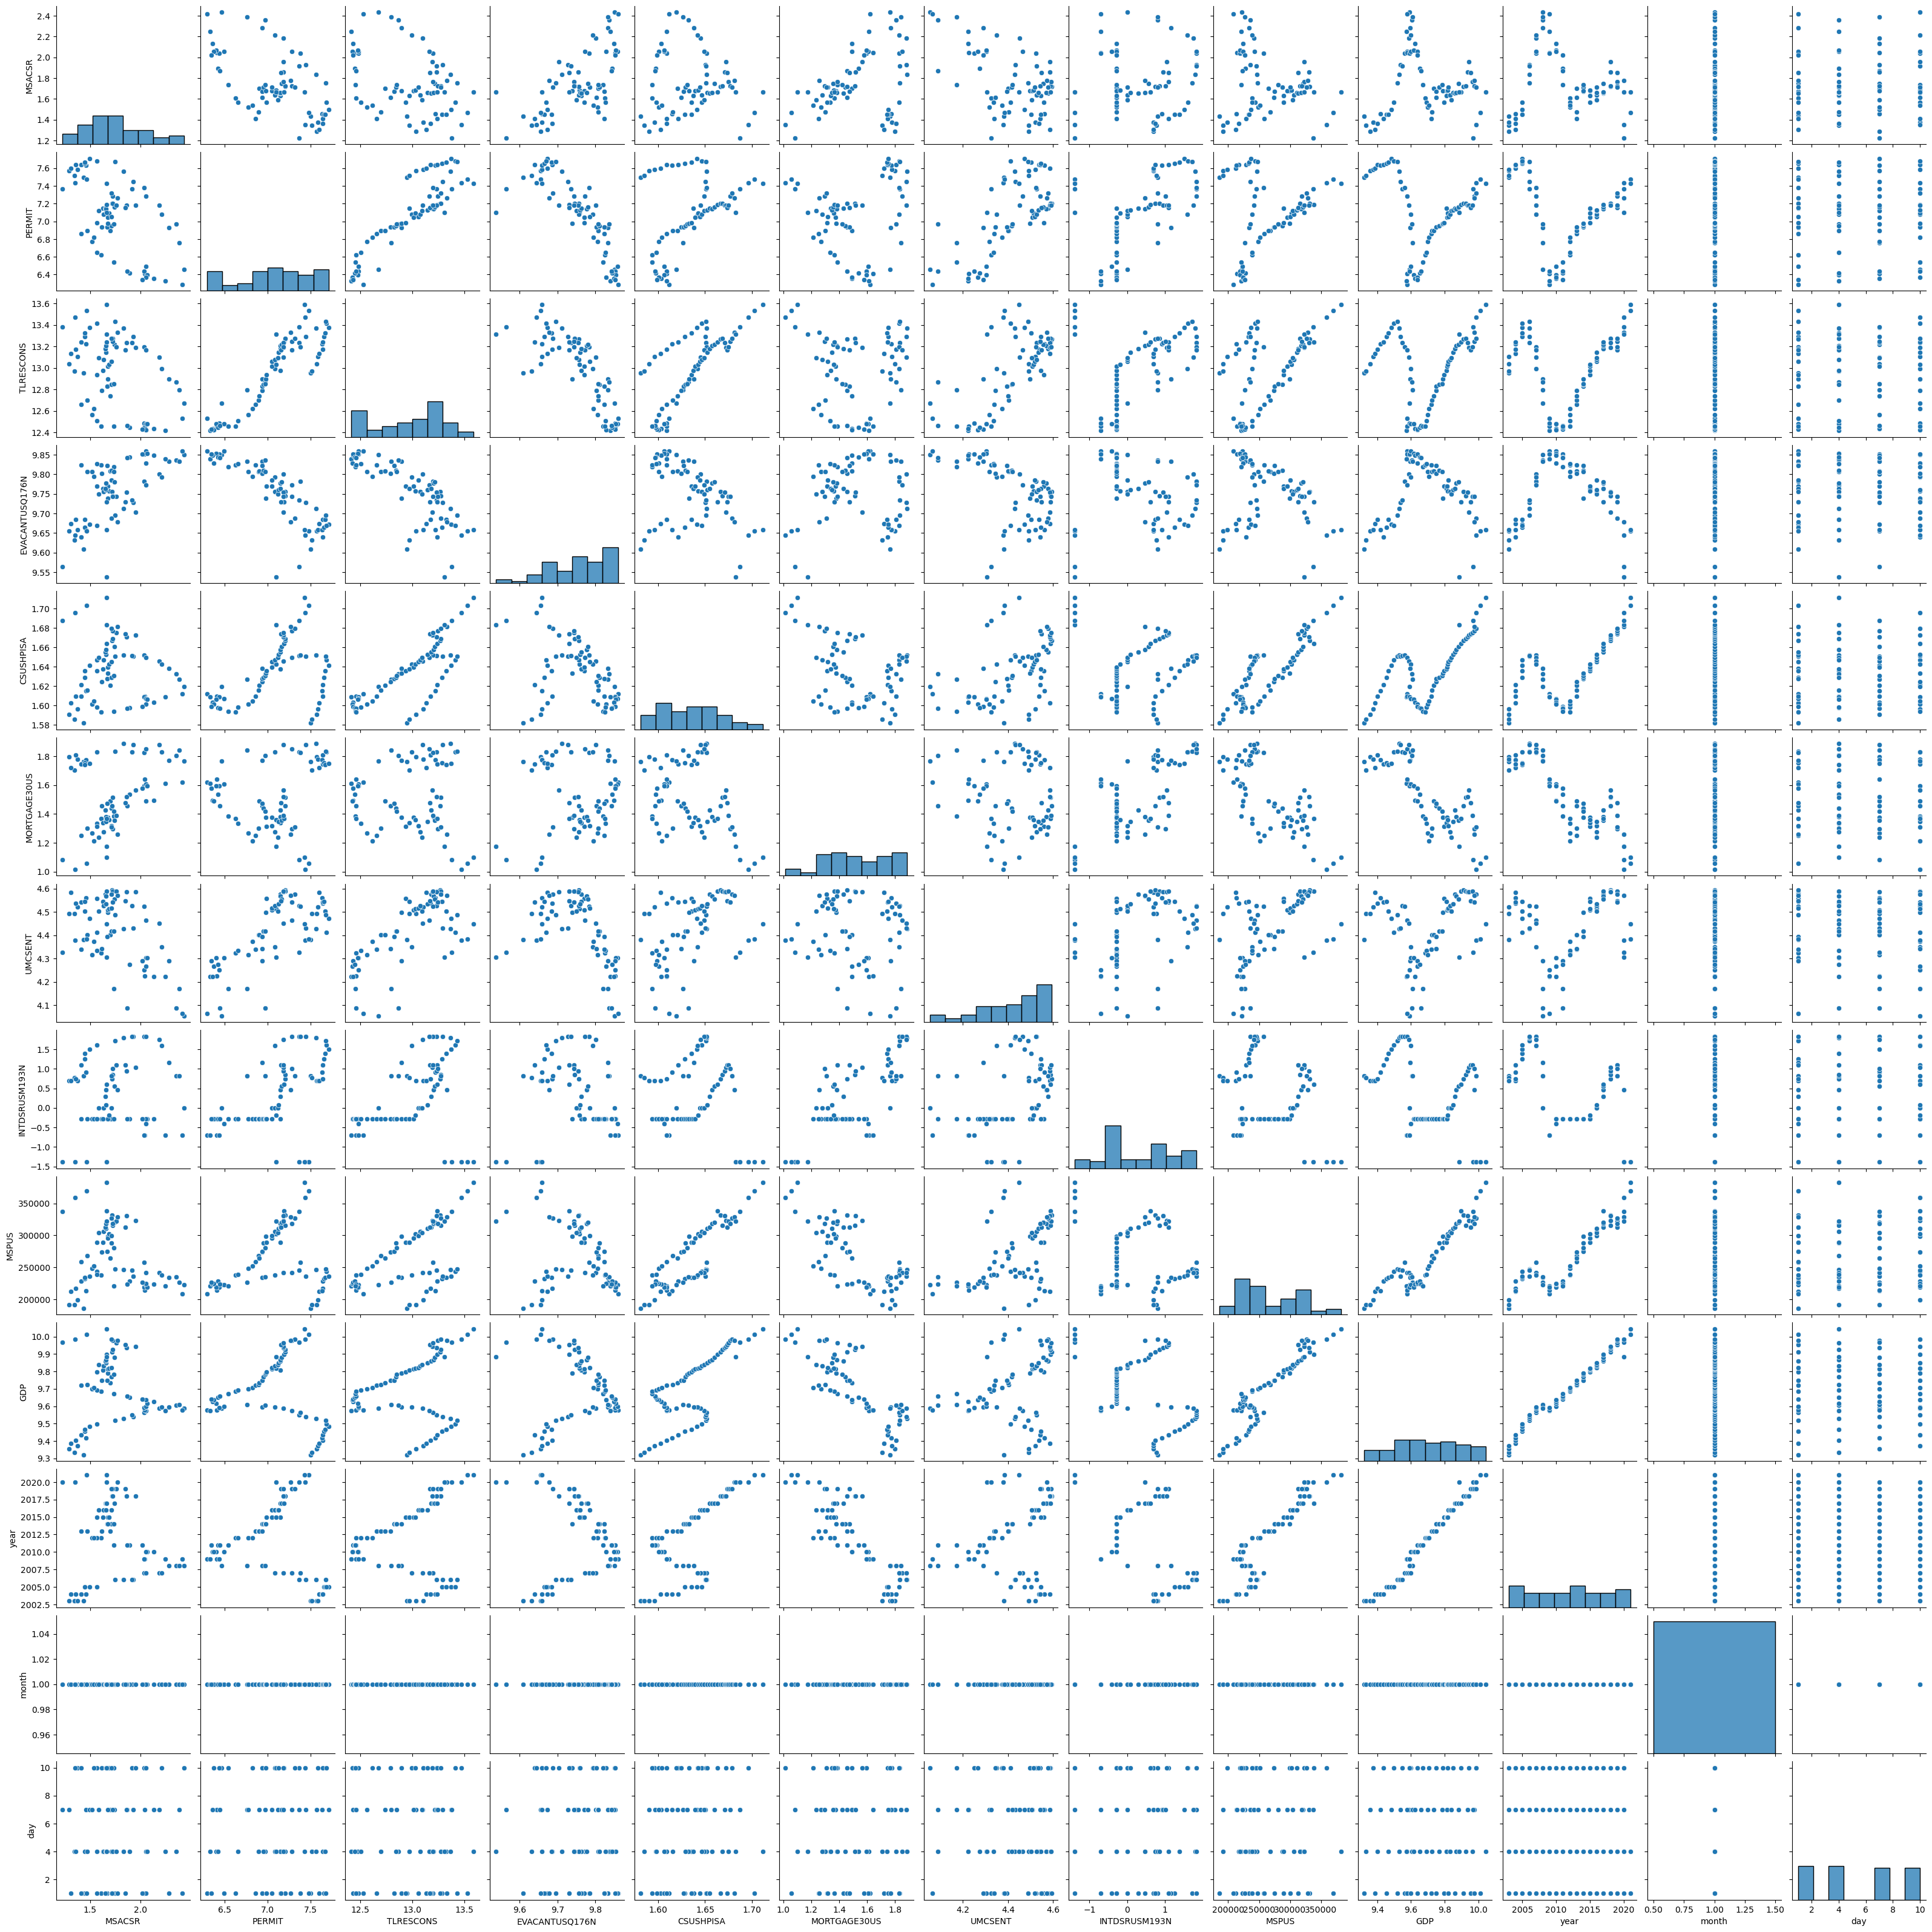

In [29]:
sns.pairplot(data=df)

In [30]:
##Checking NUMERICAL FEATURE: integer type

numerical_continuous_feature=[feature for feature in df.columns if  df[feature].dtype=='int64']
df[numerical_continuous_feature].head()

,MSPUS,year,month,day
0,186000,2003,1,1
1,191800,2003,1,4
2,191900,2003,1,7
3,198800,2003,1,10
4,212700,2004,1,1


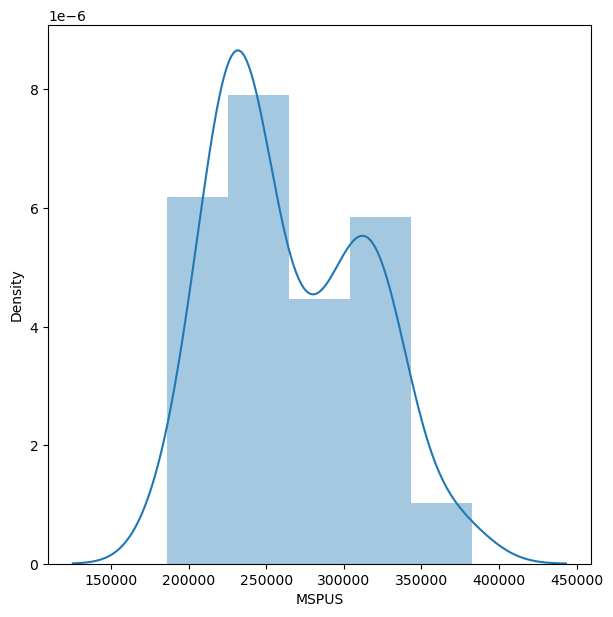

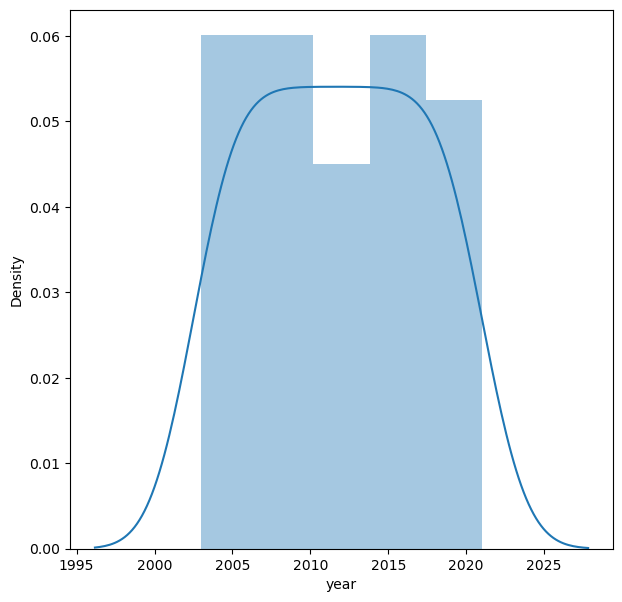

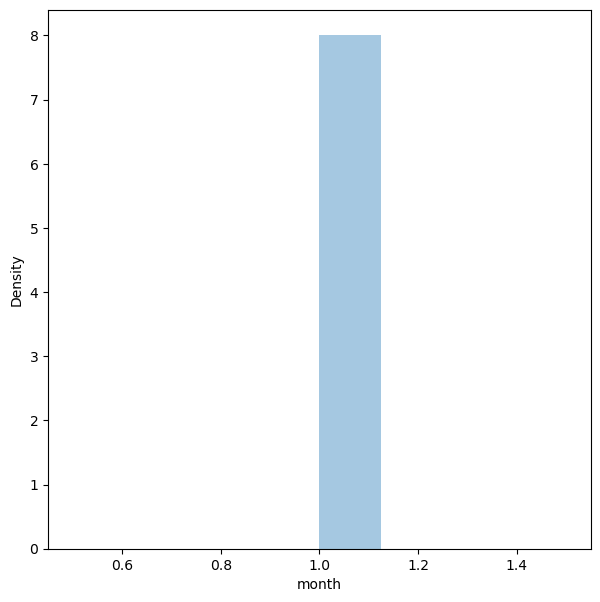

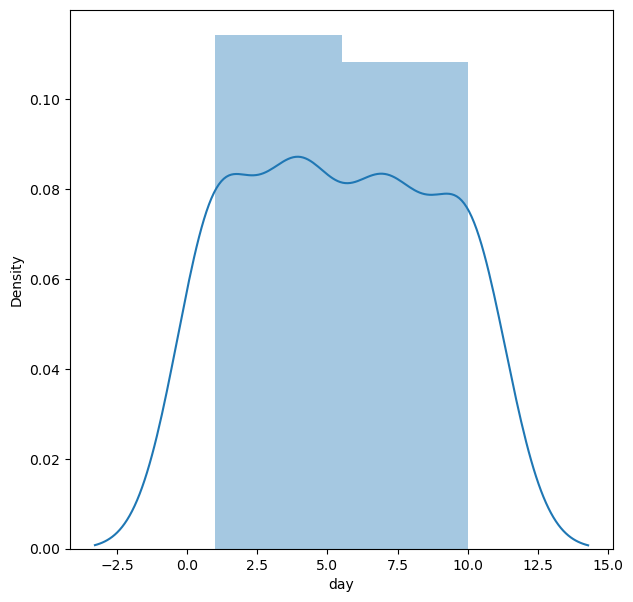

In [31]:
for feature in numerical_continuous_feature:
  plt.figure(figsize=(7,7))
  sns.distplot(df[feature],kde=True)

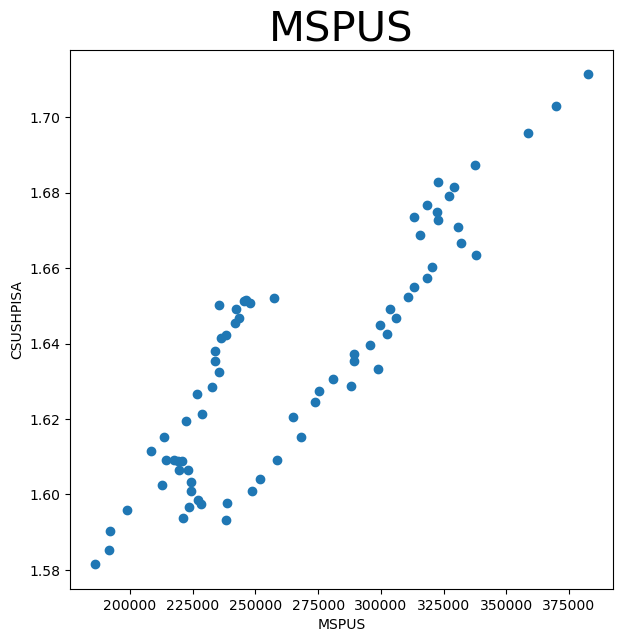

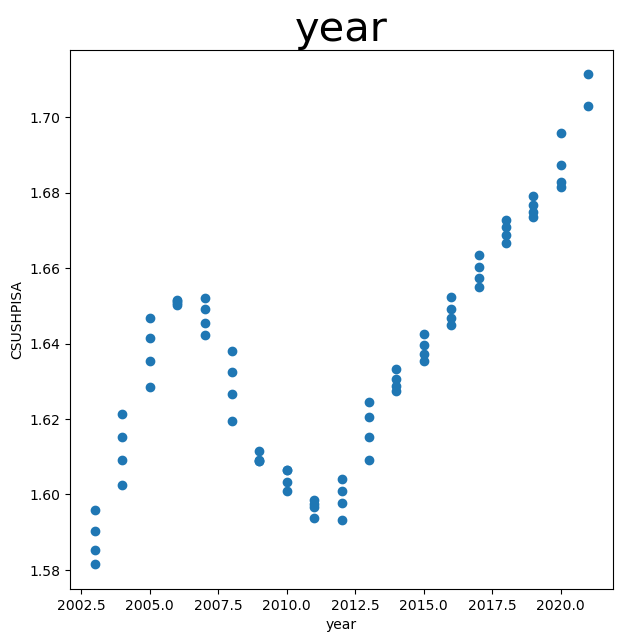

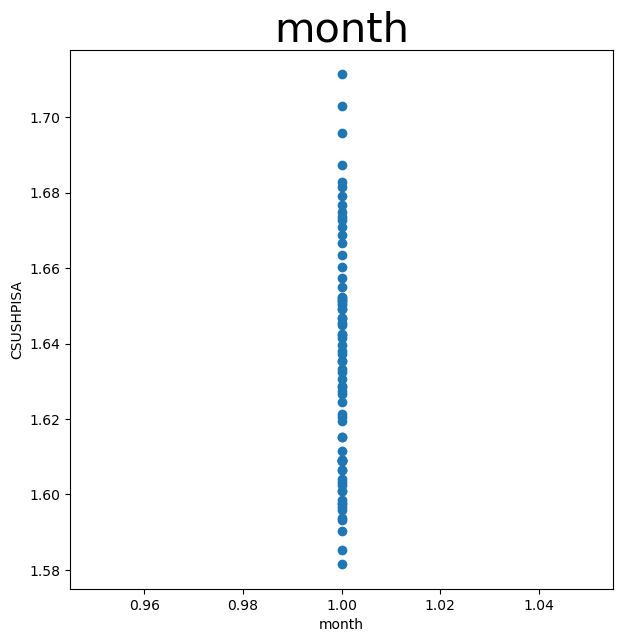

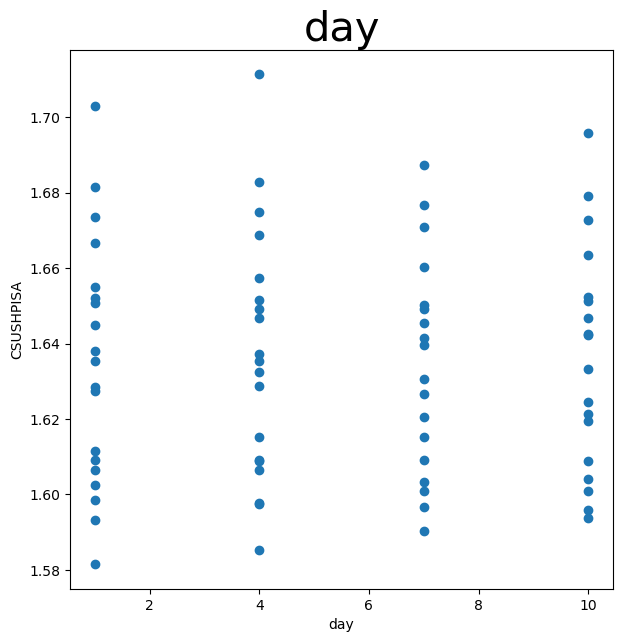

In [32]:
for feature in numerical_continuous_feature:
  plt.figure(figsize=(7,7))
  plt.scatter(x=feature,y='CSUSHPISA',data=df)
  plt.xlabel(feature)
  plt.ylabel("CSUSHPISA")
  plt.title(feature,fontsize=30)

# Training

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [34]:
X=df.drop(['CSUSHPISA'],axis=1)
y=df['CSUSHPISA']

In [35]:
#spliting train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [36]:
print(X_train.shape)
print(X_test.shape)

(51, 12)
(23, 12)


In [37]:
#using a min-max Scaler
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
scaled_X_train= pd.DataFrame(minmax.fit_transform(X_train),columns=X_train.columns)
scaled_X_test=pd.DataFrame(minmax.transform(X_test),columns=X_test.columns)

# Linear Regression

In [38]:
#Predicting using Linear Regression algorithm
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.9626271449437336

# Random forest

In [39]:
#Predicting using Random forest regressor algorithm
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.9775476392082368

# Gradient Boosting Regressor

In [40]:
#Predicting using Gradient Boosting Regressor algorithm
model=GradientBoostingRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.9841504428867163